In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
import pandas as pd
import math
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

### Preprocessing

In [ ]:
NUM_CLASSES=5
categories = ['baseball','basketball','fencing','tennis','volleyball']

In [ ]:
import math
IMG_SIZE = 224
train_X = []
train_Y= []
val_X = []
val_Y= []
test_X = []
test_Y= []
fpath = 'drive/MyDrive/Colab Notebooks/Project/data/Sport Images/'
for index, folder in enumerate(categories):
    path = os.path.join(fpath,folder)
    images = os.listdir(path)
    count = len(images)
    for i in range(0,math.ceil(0.7*count)):
        Ipath = os.path.join(path,images[i])
        img = cv2.imread(Ipath,cv2.IMREAD_COLOR)
        if img is not None:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          train_X.append(np.array(img))
          train_Y.append(index)
    for i in range(math.ceil(0.7*count),math.ceil(0.85*count)):
        Ipath = os.path.join(path,images[i])
        img = cv2.imread(Ipath,cv2.IMREAD_COLOR)
        if img is not None:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          val_X.append(np.array(img))
          val_Y.append(index)
    for i in range(math.ceil(0.85*count),count):
        Ipath = os.path.join(path,images[i])
        img = cv2.imread(Ipath,cv2.IMREAD_COLOR)
        if img is not None:
          img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
          test_X.append(np.array(img))
          test_Y.append(index)

train_X = np.array(train_X).astype('float16')
val_X = np.array(val_X).astype('float16')
test_X = np.array(test_X).astype('float16')

train_Y = np.array(train_Y)
val_Y = np.array(val_Y)
test_Y = np.array(test_Y)

print(train_X.shape)
print(train_Y.shape)

print(val_X.shape)
print(val_Y.shape)

print(test_X.shape)
print(test_Y.shape)

(2289, 224, 224, 3)
(2289,)
(486, 224, 224, 3)
(486,)
(488, 224, 224, 3)
(488,)


In [ ]:
from keras.utils import np_utils
train_Y = np_utils.to_categorical(train_Y, NUM_CLASSES)
val_Y = np_utils.to_categorical(val_Y, NUM_CLASSES)
test_Y = np_utils.to_categorical(test_Y, NUM_CLASSES)

#(e)Image Classification

EfficientNet

Empirical Regularization

In [ ]:
from tensorflow.keras.applications import vgg16, efficientnet, resnet50
from keras.preprocessing.image import ImageDataGenerator
augs_gen_efficientnet = ImageDataGenerator(preprocessing_function=efficientnet.preprocess_input,
          rotation_range=25,
          zoom_range = 0.3,
          width_shift_range=0.3,
          brightness_range=(0.1, 0.7),
          height_shift_range=0.3,
          horizontal_flip=True,
          vertical_flip=True)

augs_gen_efficientnet.fit(train_X)

Last Layer Changes

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

base_model = EfficientNetB0(include_top=False,
                    weights = 'imagenet',
                    input_shape = (IMG_SIZE,IMG_SIZE,3))

base_model.trainable = False

model_efficientnet = Sequential([base_model])
model_efficientnet.add(layers.RandomCrop(128,128))
model_efficientnet.add(layers.BatchNormalization())
model_efficientnet.add(layers.GlobalAveragePooling2D())
model_efficientnet.add(layers.Dropout(0.2))
model_efficientnet.add(layers.ReLU())
model_efficientnet.add(layers.Dense(NUM_CLASSES,activation='softmax'))
model_efficientnet.summary()
model_efficientnet.compile(
      loss='categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

16705208/16705208 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 random_crop (RandomCrop)    (None, 128, 128, 1280)    0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 1280)   5120      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                         

Training Model

In [ ]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = model_efficientnet.fit(augs_gen_efficientnet.flow(train_X,train_Y), batch_size=5, epochs=epochs, validation_data=(efficientnet.preprocess_input(val_X),val_Y), callbacks=[callback], verbose=1)

Epoch 1/100
72/72 [==============================] - 43s 407ms/step - loss: 1.2359 - accuracy: 0.5181 - val_loss: 0.8076 - val_accuracy: 0.7881
Epoch 2/100
72/72 [==============================] - 28s 381ms/step - loss: 0.8614 - accuracy: 0.7147 - val_loss: 0.6071 - val_accuracy: 0.8086
Epoch 3/100
72/72 [==============================] - 27s 379ms/step - loss: 0.7418 - accuracy: 0.7401 - val_loss: 0.4931 - val_accuracy: 0.8333
Epoch 4/100
72/72 [==============================] - 27s 378ms/step - loss: 0.6732 - accuracy: 0.7737 - val_loss: 0.4397 - val_accuracy: 0.8313
Epoch 5/100
72/72 [==============================] - 27s 380ms/step - loss: 0.6372 - accuracy: 0.7720 - val_loss: 0.4019 - val_accuracy: 0.8457
Epoch 6/100
72/72 [==============================] - 28s 385ms/step - loss: 0.5889 - accuracy: 0.7872 - val_loss: 0.3943 - val_accuracy: 0.8477
Epoch 7/100
72/72 [==============================] - 28s 382ms/step - loss: 0.5763 - accuracy: 0.7960 - val_loss: 0.3718 - val_accuracy:

Best Training Accuracy: 85.01529097557068%
Best Validation Accuracy: 89.5061731338501%


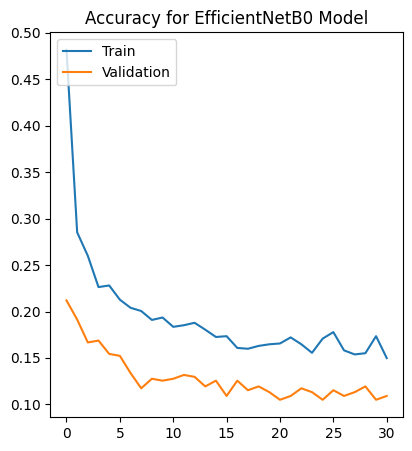

In [ ]:
train_error = [1-x for x in history.history['accuracy']]
test_error = [1-x for x in history.history['val_accuracy']]
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(train_error, label = 'Train')
plt.plot(test_error, label = 'Validation')
plt.title('Accuracy for EfficientNetB0 Model')
plt.legend(loc = 'upper left')
max_train_acc = 100*np.max(history.history['accuracy'])
print("Best Training Accuracy: {}%".format(max_train_acc))
max_val_acc = 100*np.max(history.history['val_accuracy'])
print("Best Validation Accuracy: {}%".format(max_val_acc))

In [ ]:
from sklearn.metrics import *
pred = np.argmax(model_efficientnet.predict(efficientnet.preprocess_input(test_X)), axis = -1)
y = np.argmax(test_Y, axis = -1)
cm = confusion_matrix(y, pred)

16/16 [==============================] - 2s 28ms/step


Test Confusion Matrix



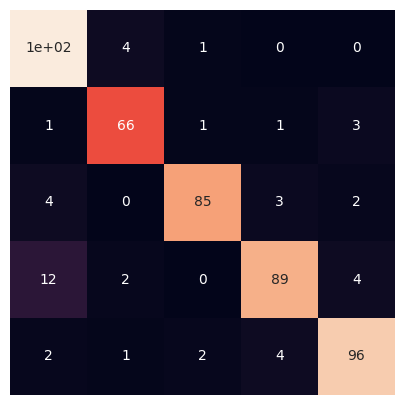

In [ ]:
import seaborn as sns
print("Test Confusion Matrix\n")
plt.figure(figsize = (5,5))
sns.heatmap(data = cm, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
pred_train = np.argmax(model_efficientnet.predict(efficientnet.preprocess_input(train_X)), axis = -1)
y_train = np.argmax(train_Y, axis = -1)
cm_train = confusion_matrix(y_train, pred_train)

72/72 [==============================] - 2s 27ms/step


Train Confusion Matrix



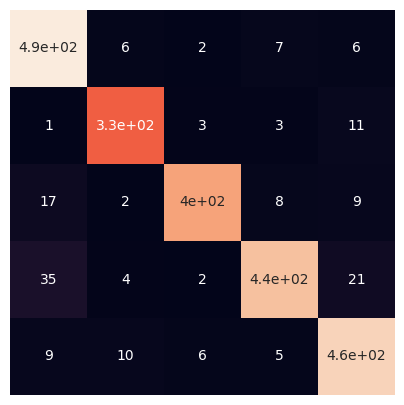

In [ ]:
print("Train Confusion Matrix\n")
plt.figure(figsize = (5,5))
sns.heatmap(data = cm_train, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

Test Classification Report

In [ ]:
from sklearn.metrics import *
print(classification_report(test_Y, np_utils.to_categorical(pred, NUM_CLASSES)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       110
           1       0.90      0.92      0.91        72
           2       0.96      0.90      0.93        94
           3       0.92      0.83      0.87       107
           4       0.91      0.91      0.91       105

   micro avg       0.90      0.90      0.90       488
   macro avg       0.91      0.90      0.90       488
weighted avg       0.91      0.90      0.90       488
 samples avg       0.90      0.90      0.90       488



Train Classification Report

In [ ]:
print(classification_report(train_Y, np_utils.to_categorical(pred_train, NUM_CLASSES)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       514
           1       0.94      0.95      0.94       344
           2       0.97      0.92      0.94       438
           3       0.95      0.88      0.91       501
           4       0.91      0.94      0.92       492

   micro avg       0.93      0.93      0.93      2289
   macro avg       0.93      0.93      0.93      2289
weighted avg       0.93      0.93      0.93      2289
 samples avg       0.93      0.93      0.93      2289



VGG16

Empirical Regularization

In [ ]:
augs_gen_vgg16 = ImageDataGenerator(preprocessing_function=vgg16.preprocess_input,
        rotation_range=25,
        zoom_range = 0.3,
        width_shift_range=0.3,
        brightness_range=(0.1, 0.7),
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

augs_gen_vgg16.fit(train_X)

Last Layer Changes

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(include_top=False,
                  weights = 'imagenet',
                  input_shape = (IMG_SIZE,IMG_SIZE,3))

base_model.trainable = False

model_vgg16 = Sequential([base_model])
model_vgg16.add(layers.RandomCrop(128,128))
model_vgg16.add(layers.BatchNormalization())
model_vgg16.add(layers.GlobalAveragePooling2D())
model_vgg16.add(layers.Dropout(0.2))
model_vgg16.add(layers.ReLU())
model_vgg16.add(layers.Dense(NUM_CLASSES,activation='softmax'))
model_vgg16.summary()
model_vgg16.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])


58889256/58889256 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 random_crop_2 (RandomCrop)  (None, 128, 128, 512)     0         
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 512)    2048      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                       

Training Model

In [ ]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
history = model_vgg16.fit(augs_gen_vgg16.flow(train_X,train_Y), batch_size=5, epochs=epochs, validation_data=(vgg16.preprocess_input(val_X),val_Y), callbacks=[callback], verbose=1)

Epoch 1/100
72/72 [==============================] - 32s 411ms/step - loss: 1.4467 - accuracy: 0.3849 - val_loss: 1.1093 - val_accuracy: 0.6214
Epoch 2/100
72/72 [==============================] - 28s 391ms/step - loss: 1.1809 - accuracy: 0.5806 - val_loss: 0.8764 - val_accuracy: 0.7078
Epoch 3/100
72/72 [==============================] - 28s 390ms/step - loss: 1.0350 - accuracy: 0.6474 - val_loss: 0.7987 - val_accuracy: 0.7387
Epoch 4/100
72/72 [==============================] - 28s 390ms/step - loss: 0.9654 - accuracy: 0.6671 - val_loss: 0.7204 - val_accuracy: 0.7737
Epoch 5/100
72/72 [==============================] - 28s 390ms/step - loss: 0.8981 - accuracy: 0.6889 - val_loss: 0.6875 - val_accuracy: 0.7798
Epoch 6/100
72/72 [==============================] - 28s 389ms/step - loss: 0.8389 - accuracy: 0.7134 - val_loss: 0.6563 - val_accuracy: 0.7881
Epoch 7/100
72/72 [==============================] - 28s 390ms/step - loss: 0.8119 - accuracy: 0.7169 - val_loss: 0.6902 - val_accuracy:

Best Training Accuracy: 79.20489311218262%
Best Validation Accuracy: 86.41975522041321%


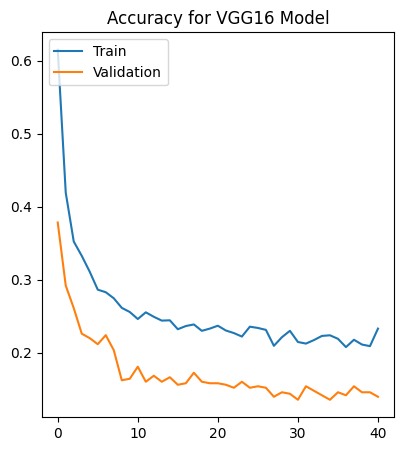

In [ ]:
train_error = [1-x for x in history.history['accuracy']]
test_error = [1-x for x in history.history['val_accuracy']]
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(train_error, label = 'Train')
plt.plot(test_error, label = 'Validation')
plt.title('Accuracy for VGG16 Model')
plt.legend(loc = 'upper left')
max_train_acc = 100*np.max(history.history['accuracy'])
print("Best Training Accuracy: {}%".format(max_train_acc))
max_val_acc = 100*np.max(history.history['val_accuracy'])
print("Best Validation Accuracy: {}%".format(max_val_acc))

In [ ]:
from sklearn.metrics import *
pred_vgg16 = np.argmax(model_vgg16.predict(vgg16.preprocess_input(test_X)), axis = -1)
y = np.argmax(test_Y, axis = -1)
cm_vgg16 = confusion_matrix(y, pred_vgg16)

16/16 [==============================] - 1s 50ms/step


Test Confusion Matrix



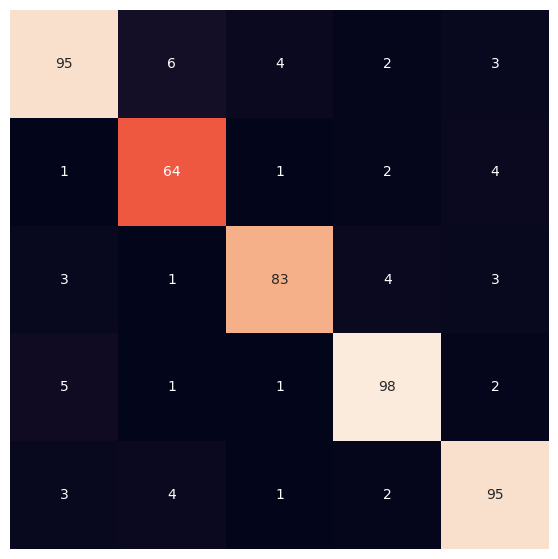

In [ ]:
import seaborn as sns
print("Test Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm_vgg16, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
pred_vgg16_train = np.argmax(model_vgg16.predict(vgg16.preprocess_input(train_X)), axis = -1)
y_train = np.argmax(train_Y, axis = -1)
cm_vgg16_train = confusion_matrix(y_train, pred_vgg16_train)

72/72 [==============================] - 2s 26ms/step


Train Confusion Matrix



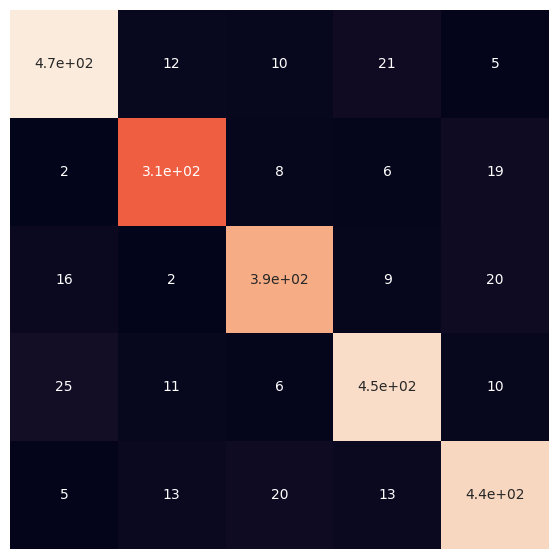

In [ ]:
print("Train Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm_vgg16_train, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
tf.keras.models.save_model(model_vgg16, 'drive/MyDrive/Colab Notebooks/Project/vgg16.h5')

Test Classification Report

In [ ]:
from sklearn.metrics import *
print(classification_report(test_Y, np_utils.to_categorical(pred_vgg16, NUM_CLASSES)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       110
           1       0.84      0.89      0.86        72
           2       0.92      0.88      0.90        94
           3       0.91      0.92      0.91       107
           4       0.89      0.90      0.90       105

   micro avg       0.89      0.89      0.89       488
   macro avg       0.89      0.89      0.89       488
weighted avg       0.89      0.89      0.89       488
 samples avg       0.89      0.89      0.89       488



Train Classification Report

In [ ]:
print(classification_report(train_Y, np_utils.to_categorical(pred_vgg16_train, NUM_CLASSES)))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       514
           1       0.89      0.90      0.89       344
           2       0.90      0.89      0.90       438
           3       0.90      0.90      0.90       501
           4       0.89      0.90      0.89       492

   micro avg       0.90      0.90      0.90      2289
   macro avg       0.90      0.90      0.90      2289
weighted avg       0.90      0.90      0.90      2289
 samples avg       0.90      0.90      0.90      2289



ResNet50

Empirical Regularization

In [ ]:
augs_gen_resnet50 = ImageDataGenerator(preprocessing_function=resnet50.preprocess_input,
        rotation_range=25,
        zoom_range = 0.3,
        width_shift_range=0.3,
        brightness_range=(0.1, 0.7),
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

augs_gen_resnet50.fit(train_X)

Last Layer Changes

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False,
                  weights = 'imagenet',
                  input_shape = (IMG_SIZE,IMG_SIZE,3))

base_model.trainable = False

model_resnet50 = Sequential([base_model])
model_resnet50.add(layers.RandomCrop(128,128))
model_resnet50.add(layers.BatchNormalization())
model_resnet50.add(layers.GlobalAveragePooling2D())
model_resnet50.add(layers.Dropout(0.2))
model_resnet50.add(layers.ReLU())
model_resnet50.add(layers.Dense(NUM_CLASSES,activation='softmax'))
model_resnet50.summary()
model_resnet50.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 random_crop_4 (RandomCrop)  (None, 128, 128, 2048)    0         
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 2048)   8192      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                       

In [ ]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
history = model_resnet50.fit(augs_gen_resnet50.flow(train_X,train_Y), batch_size=5, epochs=epochs, validation_data=(resnet50.preprocess_input(val_X),val_Y), callbacks=[callback], verbose=1)

Epoch 1/100
72/72 [==============================] - 37s 449ms/step - loss: 1.3278 - accuracy: 0.4535 - val_loss: 0.8858 - val_accuracy: 0.6975
Epoch 2/100
72/72 [==============================] - 30s 415ms/step - loss: 1.0486 - accuracy: 0.5990 - val_loss: 0.5998 - val_accuracy: 0.7901
Epoch 3/100
72/72 [==============================] - 30s 421ms/step - loss: 0.9775 - accuracy: 0.6278 - val_loss: 0.6338 - val_accuracy: 0.7716
Epoch 4/100
72/72 [==============================] - 30s 417ms/step - loss: 0.8958 - accuracy: 0.6623 - val_loss: 0.5382 - val_accuracy: 0.8128
Epoch 5/100
72/72 [==============================] - 30s 416ms/step - loss: 0.8673 - accuracy: 0.6811 - val_loss: 0.4604 - val_accuracy: 0.8498
Epoch 6/100
72/72 [==============================] - 30s 413ms/step - loss: 0.8573 - accuracy: 0.6728 - val_loss: 0.4463 - val_accuracy: 0.8251
Epoch 7/100
72/72 [==============================] - 30s 415ms/step - loss: 0.8301 - accuracy: 0.7021 - val_loss: 0.4194 - val_accuracy:

Best Training Accuracy: 76.0594129562378%
Best Validation Accuracy: 86.83127760887146%


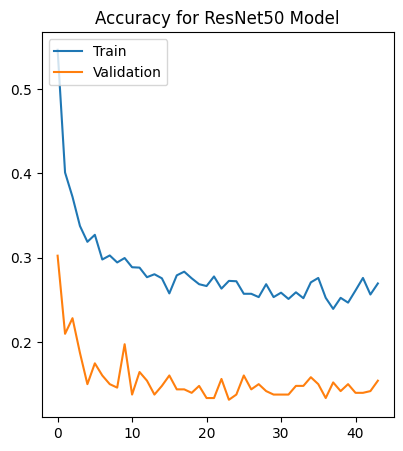

In [ ]:
train_error = [1-x for x in history.history['accuracy']]
test_error = [1-x for x in history.history['val_accuracy']]
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(train_error, label = 'Train')
plt.plot(test_error, label = 'Validation')
plt.title('Accuracy for ResNet50 Model')
plt.legend(loc = 'upper left')
max_train_acc = 100*np.max(history.history['accuracy'])
print("Best Training Accuracy: {}%".format(max_train_acc))
max_val_acc = 100*np.max(history.history['val_accuracy'])
print("Best Validation Accuracy: {}%".format(max_val_acc))

In [ ]:
from sklearn.metrics import *
pred_resnet50 = np.argmax(model_resnet50.predict(resnet50.preprocess_input(test_X)), axis = -1)
y = np.argmax(test_Y, axis = -1)
cm_resnet50 = confusion_matrix(y,pred_resnet50)

16/16 [==============================] - 2s 48ms/step


Test Confusion Matrix



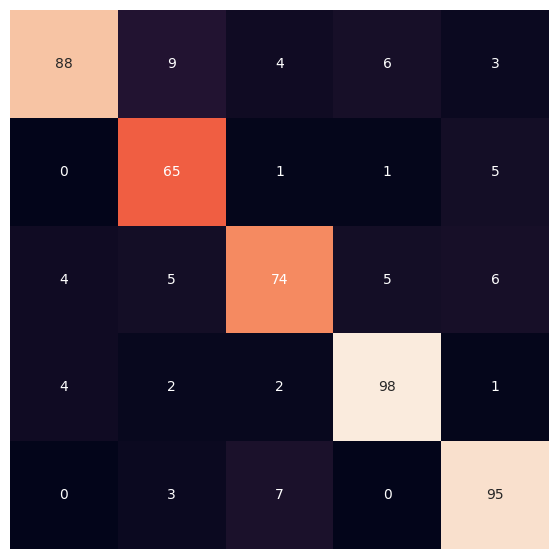

In [ ]:
import seaborn as sns
print("Test Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm_resnet50, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
pred_resnet50_train = np.argmax(model_resnet50.predict(resnet50.preprocess_input(train_X)), axis = -1)
y_train = np.argmax(train_Y, axis = -1)
cm_resnet50_train = confusion_matrix(y_train,pred_resnet50_train)

72/72 [==============================] - 2s 33ms/step


Train Confusion Matrix



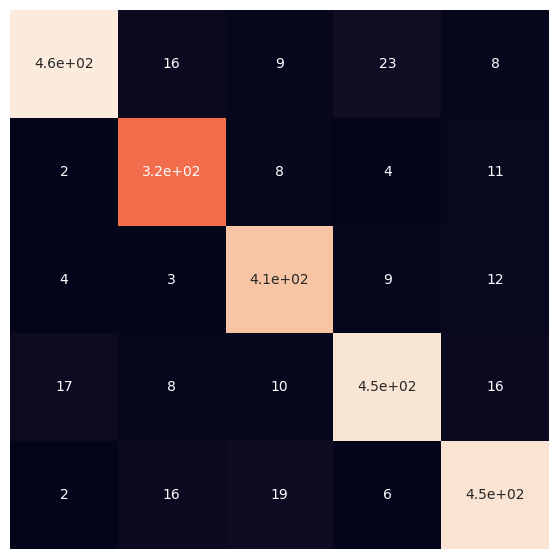

In [ ]:
print("Train Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm_resnet50_train, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
tf.keras.models.save_model(model_resnet50, 'drive/MyDrive/Colab Notebooks/Project/resnet50.h5')

Test Classification Report

In [ ]:
from sklearn.metrics import *
print(classification_report(test_Y, np_utils.to_categorical(pred_resnet50, NUM_CLASSES)))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       110
           1       0.77      0.90      0.83        72
           2       0.84      0.79      0.81        94
           3       0.89      0.92      0.90       107
           4       0.86      0.90      0.88       105

   micro avg       0.86      0.86      0.86       488
   macro avg       0.86      0.86      0.86       488
weighted avg       0.86      0.86      0.86       488
 samples avg       0.86      0.86      0.86       488



Train Classification Report

In [ ]:
print(classification_report(train_Y, np_utils.to_categorical(pred_resnet50_train, NUM_CLASSES)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       514
           1       0.88      0.93      0.90       344
           2       0.90      0.94      0.92       438
           3       0.91      0.90      0.91       501
           4       0.91      0.91      0.91       492

   micro avg       0.91      0.91      0.91      2289
   macro avg       0.91      0.91      0.91      2289
weighted avg       0.91      0.91      0.91      2289
 samples avg       0.91      0.91      0.91      2289



#(f)Video Classification

In [ ]:
full_X = np.concatenate([train_X,val_X,test_X])

In [ ]:
full_Y = np.concatenate([train_Y,val_Y,test_Y])

In [ ]:
categories_video = ['BaseballPitch', 'Basketball', 'Fencing', 'TennisSwing', 'VolleyballSpiking']

In [ ]:
import os
ytrain = []
fpath = 'drive/MyDrive/Colab Notebooks/Project/data/Sport Videos/'
for index, folder in enumerate(categories_video):
    print(folder)
    path   = os.path.join(fpath,folder)
    videos = os.listdir(path)
    print(len(videos))
    ytrain += [index]*len(videos)

BaseballPitch
150
Basketball
137
Fencing
111
TennisSwing
167
VolleyballSpiking
116


In [ ]:
actual = ytrain

In [ ]:
def compare_arrays(array1, array2):
  count = 0
  for i in range(len(array1)):
    if array1[i] == array2[i]:
      count += 1
  return count

Retraining EfficientNet and Classifying Videos

In [ ]:
from tensorflow.keras.applications import vgg16, efficientnet, resnet50
augs_gen_efficientnet.fit(full_X)

In [ ]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=10, restore_best_weights=True)
history = model_efficientnet.fit(augs_gen_efficientnet.flow(full_X,full_Y), batch_size=5, epochs=epochs,callbacks=[callback], verbose=1)

Epoch 1/100
102/102 [==============================] - 45s 367ms/step - loss: 1.1494 - accuracy: 0.5670
Epoch 2/100
102/102 [==============================] - 38s 367ms/step - loss: 0.7958 - accuracy: 0.7156
Epoch 3/100
102/102 [==============================] - 38s 368ms/step - loss: 0.6910 - accuracy: 0.7518
Epoch 4/100
102/102 [==============================] - 37s 366ms/step - loss: 0.6262 - accuracy: 0.7846
Epoch 5/100
102/102 [==============================] - 37s 366ms/step - loss: 0.6197 - accuracy: 0.7787
Epoch 6/100
102/102 [==============================] - 37s 366ms/step - loss: 0.5819 - accuracy: 0.7950
Epoch 7/100
102/102 [==============================] - 38s 368ms/step - loss: 0.5483 - accuracy: 0.8042
Epoch 8/100
102/102 [==============================] - 38s 368ms/step - loss: 0.5409 - accuracy: 0.8085
Epoch 9/100
102/102 [==============================] - 37s 366ms/step - loss: 0.5330 - accuracy: 0.8121
Epoch 10/100
102/102 [==============================] - 37s 366m

In [ ]:
train_error = [1-x for x in history.history['accuracy']]
max_retrain_acc = 100*np.max(history.history['accuracy'])
print("Best Accuracy after retraining: {}%".format(max_retrain_acc))

Best Accuracy after retraining: 85.10572910308838%


In [ ]:
import pickle
from collections import Counter
from tensorflow.keras.applications import efficientnet

IMG_SIZE = 224
trainY = []
fpath = 'drive/MyDrive/Colab Notebooks/Project/data/Sport Videos/'
for index, folder in enumerate(categories_video):
    print(folder)
    path   = os.path.join(fpath,folder)
    videos = os.listdir(path)
    print(len(videos))
    category_prediction = []
    trainY.append(index)
    for i in range(0,len(videos)):
        print(i)
        Ipath           = os.path.join(path,videos[i])
        vidcap          = cv2.VideoCapture(Ipath)
        if vidcap is None:
            print('Wrong path:', path)
        else:

            total_frames    = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
            frames_step     = total_frames//100
            (W,H)           = (None,None)
            prediction      = []
            prediction_prob = []
            for i in range(100):
                vidcap.set(1,i*frames_step)
                (grabbed, frame) = vidcap.read()
                if not grabbed:
                    break
                if W is None or H is None:
                    (H,W) = frame.shape[:2]
                output = frame.copy()
                frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                img    = cv2.resize(frame, dsize=(IMG_SIZE,IMG_SIZE))
                img    = np.expand_dims(img, axis=0)
                pred   = model_efficientnet.predict(efficientnet.preprocess_input(np.array(img).astype('float16')))
                predd  = np.argmax(pred)
                prediction_prob.append(pred)
                prediction.append(predd)
            vidcap.release()
            b = Counter(prediction)
            category_prediction.append(b.most_common(1)[0][0])
    with open(folder + '.pkl', 'wb') as f:
        pickle.dump(category_prediction, f)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step
67
1/1 [==============================] - 0s 27ms/step
68
1/1 [==============================] - 0s 33ms/step
69
1/1 [==============================] - 0s 35ms/step
70
1/1 [==============================] - 0s 28ms/step
71
1/1 [==============================] - 0s 27ms/step
72
1/1 [==============================] - 0s 26ms/step
73
1/1 [==============================] - 0s 26ms/step
74
1/1 [==============================] - 0s 26ms/step
75
1/1 [==============================] - 0s 26ms/step
76
1/1 [==============================] - 0s 27ms/step
77
1/1 [==============================] - 0s 26ms/step
78
1/1 [==============================] - 0s 26ms/step
79
1/1 [==============================] - 0s 27ms/step
80
1/1 [==============================] - 0s 26ms/step
81
1/1 [==============================] - 0s 28ms/step
82
1/1 [==============================] - 0s 27ms/step
83
1/1 [=========

In [ ]:
import pickle

with open('BaseballPitch.pkl', 'rb') as f:
    BaseballPitch = pickle.load(f)
    f.close()

with open('Basketball.pkl', 'rb') as f:
    Basketball = pickle.load(f)
    f.close()
with open('Fencing.pkl', 'rb') as f:
    Fencing = pickle.load(f)
    f.close()
with open('TennisSwing.pkl', 'rb') as f:
    TennisSwing = pickle.load(f)
    f.close()
with open('VolleyballSpiking.pkl', 'rb') as f:
    VolleyballSpiking = pickle.load(f)
    f.close()

In [ ]:
pred_list = BaseballPitch + Basketball + Fencing + TennisSwing + VolleyballSpiking

In [ ]:
print(compare_arrays(actual, pred_list))

383


In [ ]:
print('Accuracy of EfficientNet on Video Classification is:', (compare_arrays(actual, pred_list)/len(actual))*100, '%')

Accuracy of EfficientNet on Video Classification is: 56.24082232011748 %


Confusion Matrix



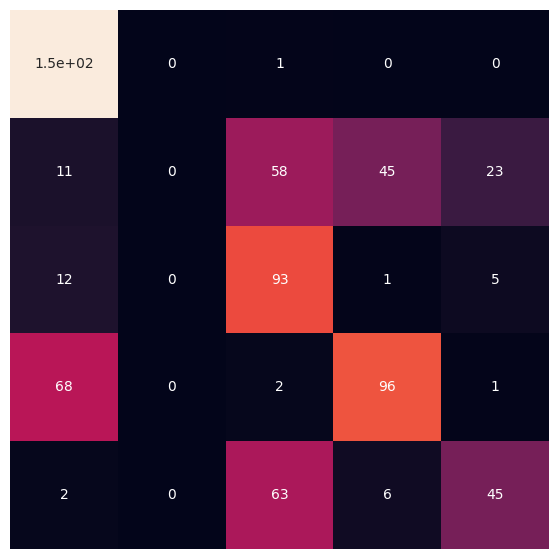

In [ ]:
import seaborn as sns
from sklearn.metrics import *
cm = confusion_matrix(actual, pred_list)
print("Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
print('EfficientNet Video Classification')
print(classification_report(actual, pred_list))

EfficientNet Video Classification
              precision    recall  f1-score   support

           0       0.62      0.99      0.76       150
           1       0.00      0.00      0.00       137
           2       0.43      0.84      0.57       111
           3       0.65      0.57      0.61       167
           4       0.61      0.39      0.47       116

    accuracy                           0.56       681
   macro avg       0.46      0.56      0.48       681
weighted avg       0.47      0.56      0.49       681



Retrainging VGG16 and Classifying Videos

In [ ]:
augs_gen_vgg16.fit(full_X)

In [ ]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=10, restore_best_weights=True)
history = model_vgg.fit(augs_gen_vgg16.flow(full_X,full_Y), batch_size=5, epochs=epochs,callbacks=[callback], verbose=1)

Epoch 1/100
102/102 [==============================] - 40s 380ms/step - loss: 1.3963 - accuracy: 0.4183
Epoch 2/100
102/102 [==============================] - 39s 379ms/step - loss: 1.0999 - accuracy: 0.6172
Epoch 3/100
102/102 [==============================] - 39s 378ms/step - loss: 0.9644 - accuracy: 0.6684
Epoch 4/100
102/102 [==============================] - 39s 378ms/step - loss: 0.8639 - accuracy: 0.7107
Epoch 5/100
102/102 [==============================] - 39s 378ms/step - loss: 0.8262 - accuracy: 0.7073
Epoch 6/100
102/102 [==============================] - 39s 378ms/step - loss: 0.7895 - accuracy: 0.7199
Epoch 7/100
102/102 [==============================] - 39s 377ms/step - loss: 0.7670 - accuracy: 0.7318
Epoch 8/100
102/102 [==============================] - 39s 377ms/step - loss: 0.7440 - accuracy: 0.7352
Epoch 9/100
102/102 [==============================] - 39s 378ms/step - loss: 0.7221 - accuracy: 0.7435
Epoch 10/100
102/102 [==============================] - 39s 378m

In [ ]:
train_error = [1-x for x in history.history['accuracy']]
max_retrain_acc = 100*np.max(history.history['accuracy'])
print("Best Accuracy after retraining: {}%".format(max_retrain_acc))

Best Accuracy after retraining: 78.48605513572693%


In [ ]:
import pickle
from collections import Counter
from tensorflow.keras.applications import vgg16

IMG_SIZE = 224
trainY = []
fpath = 'drive/MyDrive/Colab Notebooks/Project/data/Sport Videos/'
for index, folder in enumerate(categories_video):
    print(folder)
    path   = os.path.join(fpath,folder)
    videos = os.listdir(path)
    print(len(videos))
    category_prediction = []
    trainY.append(index)
    for i in range(0,len(videos)):
        print(i)
        Ipath           = os.path.join(path,videos[i])
        vidcap          = cv2.VideoCapture(Ipath)
        if vidcap is None:
            print('Wrong path:', path)
        else:

            total_frames    = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
            frames_step     = total_frames//100
            (W,H)           = (None,None)
            prediction      = []
            prediction_prob = []
            for i in range(100):
                vidcap.set(1,i*frames_step)
                (grabbed, frame) = vidcap.read()
                if not grabbed:
                    break
                if W is None or H is None:
                    (H,W) = frame.shape[:2]
                output = frame.copy()
                frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                img    = cv2.resize(frame, dsize=(IMG_SIZE,IMG_SIZE))
                img    = np.expand_dims(img, axis=0)
                pred   = model_vgg.predict(vgg16.preprocess_input(np.array(img).astype('float16')))
                predd  = np.argmax(pred)
                prediction_prob.append(pred)
                prediction.append(predd)
            vidcap.release()
            b = Counter(prediction)
            category_prediction.append(b.most_common(1)[0][0])
    with open(folder + '_vgg.pkl', 'wb') as f:
        pickle.dump(category_prediction, f)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
67
1/1 [==============================] - 0s 23ms/step
68
1/1 [==============================] - 0s 23ms/step
69
1/1 [==============================] - 0s 23ms/step
70
1/1 [==============================] - 0s 23ms/step
71
1/1 [==============================] - 0s 29ms/step
72
1/1 [==============================] - 0s 25ms/step
73
1/1 [==============================] - 0s 24ms/step
74
1/1 [==============================] - 0s 23ms/step
75
1/1 [==============================] - 0s 23ms/step
76
1/1 [==============================] - 0s 23ms/step
77
1/1 [==============================] - 0s 23ms/step
78
1/1 [==============================] - 0s 22ms/step
79
1/1 [==============================] - 0s 23ms/step
80
1/1 [==============================] - 0s 22ms/step
81
1/1 [==============================] - 0s 23ms/step
82
1/1 [==============================] - 0s 23ms/step
83
1/1 [=========

In [ ]:
with open('BaseballPitch_vgg.pkl', 'rb') as f:
    BaseballPitch_vgg = pickle.load(f)
    f.close()

with open('Basketball_vgg.pkl', 'rb') as f:
    Basketball_vgg = pickle.load(f)
    f.close()
with open('Fencing_vgg.pkl', 'rb') as f:
    Fencing_vgg = pickle.load(f)
    f.close()
with open('TennisSwing_vgg.pkl', 'rb') as f:
    TennisSwing_vgg = pickle.load(f)
    f.close()
with open('VolleyballSpiking_vgg.pkl', 'rb') as f:
    VolleyballSpiking_vgg = pickle.load(f)
    f.close()

In [ ]:
pred_list_vgg = BaseballPitch_vgg + Basketball_vgg + Fencing_vgg + TennisSwing_vgg + VolleyballSpiking_vgg

In [ ]:
print(compare_arrays(actual, pred_list_vgg))

375


In [ ]:
print('Accuracy of VGG16 on Video Classification is:', (compare_arrays(actual, pred_list_vgg)/len(actual))*100, '%')

Accuracy of VGG16 on Video Classification is: 55.06607929515418 %


Confusion Matrix



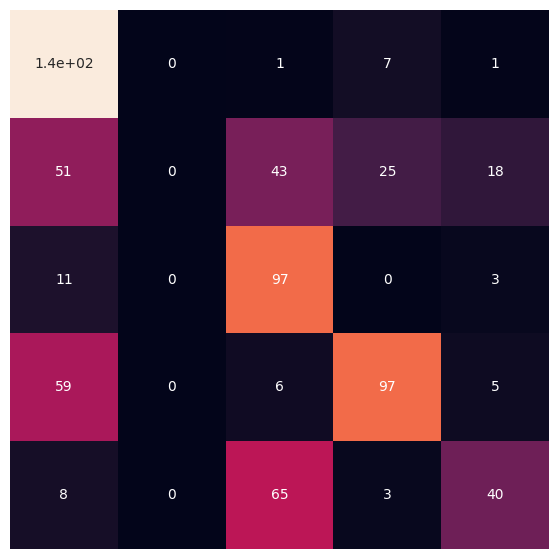

In [ ]:
import seaborn as sns
from sklearn.metrics import *
cm_vgg = confusion_matrix(actual, pred_list_vgg)
print("Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm_vgg, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
print('VGG16 Video Classification')
print(classification_report(actual, pred_list_vgg))

VGG16 Video Classification
              precision    recall  f1-score   support

           0       0.52      0.94      0.67       150
           1       0.00      0.00      0.00       137
           2       0.46      0.87      0.60       111
           3       0.73      0.58      0.65       167
           4       0.60      0.34      0.44       116

    accuracy                           0.55       681
   macro avg       0.46      0.55      0.47       681
weighted avg       0.47      0.55      0.48       681



Retraining ResNet50 and Classifying Videos

In [ ]:
augs_gen_resnet50.fit(full_X)

In [ ]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=10, restore_best_weights=True)
history = model_resnet.fit(augs_gen_resnet50.flow(full_X,full_Y), batch_size=5, epochs=epochs,callbacks=[callback], verbose=1)

Epoch 1/100
102/102 [==============================] - 43s 386ms/step - loss: 1.0315 - accuracy: 0.6129
Epoch 2/100
102/102 [==============================] - 39s 382ms/step - loss: 0.6874 - accuracy: 0.7686
Epoch 3/100
102/102 [==============================] - 39s 379ms/step - loss: 0.5861 - accuracy: 0.7937
Epoch 4/100
102/102 [==============================] - 39s 380ms/step - loss: 0.5570 - accuracy: 0.8051
Epoch 5/100
102/102 [==============================] - 39s 379ms/step - loss: 0.5096 - accuracy: 0.8259
Epoch 6/100
102/102 [==============================] - 39s 376ms/step - loss: 0.5040 - accuracy: 0.8232
Epoch 7/100
102/102 [==============================] - 39s 377ms/step - loss: 0.4643 - accuracy: 0.8373
Epoch 8/100
102/102 [==============================] - 39s 378ms/step - loss: 0.4728 - accuracy: 0.8308
Epoch 9/100
102/102 [==============================] - 39s 377ms/step - loss: 0.4586 - accuracy: 0.8351
Epoch 10/100
102/102 [==============================] - 39s 377m

In [ ]:
tf.keras.models.save_model(model_resnet_retrained, 'drive/MyDrive/Colab Notebooks/Project/resnet_retrained.h5')

In [ ]:
train_error = [1-x for x in history.history['accuracy']]
max_retrain_acc = 100*np.max(history.history['accuracy'])
print("Best Accuracy after retraining: {}%".format(max_retrain_acc))

Best Accuracy after retraining: 87.80263662338257%


In [ ]:
import pickle
from collections import Counter
from tensorflow.keras.applications import resnet50

IMG_SIZE = 224
trainY = []
fpath = 'drive/MyDrive/Colab Notebooks/Project/data/Sport Videos/'
for index, folder in enumerate(categories_video):
    print(folder)
    path   = os.path.join(fpath,folder)
    videos = os.listdir(path)
    print(len(videos))
    category_prediction = []
    trainY.append(index)
    for i in range(0,len(videos)):
        print(i)
        Ipath           = os.path.join(path,videos[i])
        vidcap          = cv2.VideoCapture(Ipath)
        if vidcap is None:
            print('Wrong path:', path)
        else:

            total_frames    = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
            frames_step     = total_frames//100
            (W,H)           = (None,None)
            prediction      = []
            prediction_prob = []
            for i in range(100):
                vidcap.set(1,i*frames_step)
                (grabbed, frame) = vidcap.read()
                if not grabbed:
                    break
                if W is None or H is None:
                    (H,W) = frame.shape[:2]
                output = frame.copy()
                frame  = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                img    = cv2.resize(frame, dsize=(IMG_SIZE,IMG_SIZE))
                img    = np.expand_dims(img, axis=0)
                pred   = model_resnet.predict(resnet50.preprocess_input(np.array(img).astype('float16')))
                predd  = np.argmax(pred)
                prediction_prob.append(pred)
                prediction.append(predd)
            vidcap.release()
            b = Counter(prediction)
            category_prediction.append(b.most_common(1)[0][0])
    with open(folder + '_res.pkl', 'wb') as f:
        pickle.dump(category_prediction, f)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
67
1/1 [==============================] - 0s 26ms/step
68
1/1 [==============================] - 0s 26ms/step
69
1/1 [==============================] - 0s 26ms/step
70
1/1 [==============================] - 0s 26ms/step
71
1/1 [==============================] - 0s 25ms/step
72
1/1 [==============================] - 0s 26ms/step
73
1/1 [==============================] - 0s 33ms/step
74
1/1 [==============================] - 0s 31ms/step
75
1/1 [==============================] - 0s 28ms/step
76
1/1 [==============================] - 0s 25ms/step
77
1/1 [==============================] - 0s 26ms/step
78
1/1 [==============================] - 0s 27ms/step
79
1/1 [==============================] - 0s 26ms/step
80
1/1 [==============================] - 0s 25ms/step
81
1/1 [==============================] - 0s 26ms/step
82
1/1 [==============================] - 0s 25ms/step
83
1/1 [=========

In [ ]:
with open('BaseballPitch_res.pkl', 'rb') as f:
    BaseballPitch_res = pickle.load(f)
    f.close()

with open('Basketball_res.pkl', 'rb') as f:
    Basketball_res = pickle.load(f)
    f.close()
with open('Fencing_res.pkl', 'rb') as f:
    Fencing_res = pickle.load(f)
    f.close()
with open('TennisSwing_res.pkl', 'rb') as f:
    TennisSwing_res = pickle.load(f)
    f.close()
with open('VolleyballSpiking_res.pkl', 'rb') as f:
    VolleyballSpiking_res = pickle.load(f)
    f.close()

In [ ]:
pred_list_res = BaseballPitch_res + Basketball_res + Fencing_res + TennisSwing_res + VolleyballSpiking_res

In [ ]:
print(compare_arrays(actual, pred_list_res))

356


In [ ]:
print('Accuracy of ResNet50 on Video Classification is:', (compare_arrays(actual, pred_list_res)/len(actual))*100, '%')

Accuracy of ResNet50 on Video Classification is: 52.27606461086637 %


Confusion Matrix



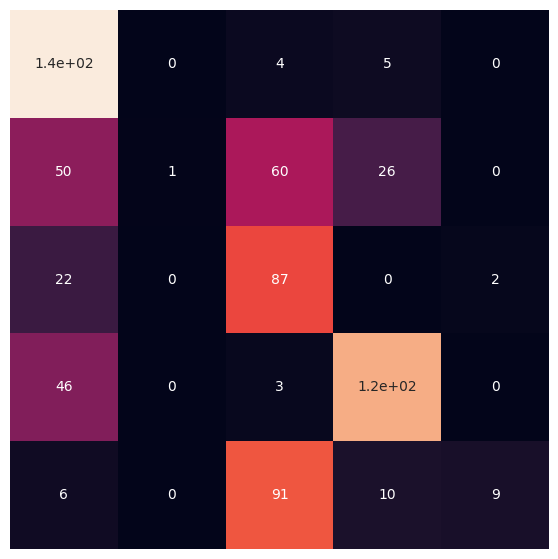

In [ ]:
import seaborn as sns
from sklearn.metrics import *
cm_res= confusion_matrix(actual, pred_list_res)
print("Confusion Matrix\n")
plt.figure(figsize = (7,7))
sns.heatmap(data = cm_res, square = True, annot = True, cbar = False)
plt.axis('off')
plt.show()

In [ ]:
print('ResNet50 Video Classification')
print(classification_report(actual, pred_list_res))

ResNet50 Video Classification
              precision    recall  f1-score   support

           0       0.53      0.94      0.68       150
           1       1.00      0.01      0.01       137
           2       0.36      0.78      0.49       111
           3       0.74      0.71      0.72       167
           4       0.82      0.08      0.14       116

    accuracy                           0.52       681
   macro avg       0.69      0.50      0.41       681
weighted avg       0.70      0.52      0.43       681



| Model       | Accuracy on Video Classification |
| :------------ | ---------------: |
| EfficientNetB0 |  56.24082232011748 % |
| VGG16 | 55.06607929515418 %|
| ResNet50 |  52.27606461086637 % |